In [512]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

##### Regression Models 

**Variables/Columns**

- `Age` - years
- `5K etc. Duration` - seconds
- `Height` - inches
- `M/F` - Male or Female


### Read the csv file into a pandas DataFrame

In [513]:
boston = pd.read_csv('marathon/Boston_Marathon_2015_to_2017.csv')
#boston.head()
#boston.shape
boston.columns

Index(['Year', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division', 'Temp (F)'],
      dtype='object')

### Use Pandas get_dummies to convert categorical data

In [514]:
# convert male/female to 0/1s

boston_mf=pd.get_dummies(boston['M/F'])

# join the two dataframes

boston_join=pd.concat([boston, boston_mf], axis=1) 

boston_join.head()

,Year,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Temp (F),F,M
0,2015,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,2:02:39,0:04:56,-,2:09:17,1,1,1,46,0,1
1,2015,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,2:02:42,0:04:58,-,2:09:48,2,2,2,46,0,1
2,2015,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,2:03:01,0:04:59,-,2:10:22,3,3,3,46,0,1
3,2015,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,2:03:47,0:05:00,-,2:10:47,4,4,4,46,0,1
4,2015,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,2:03:27,0:05:00,-,2:10:49,5,5,5,46,0,1


In [515]:
# Convert HH:MM:SS to total seconds

def time_convert(x):
    if x == "-":
        return None
    else:
        times = x.split(':')
        return (60*int(times[0])+60*int(times[1]))+int(times[2])


boston_join['5K Duration'] = boston_join['5K'].apply(time_convert)
boston_join['10K Duration'] = boston_join['10K'].apply(time_convert)
boston_join['15K Duration'] = boston_join['15K'].apply(time_convert)
boston_join['20K Duration'] = boston_join['20K'].apply(time_convert)
boston_join['Half Duration'] = boston_join['Half'].apply(time_convert)
boston_join['25K Duration'] = boston_join['25K'].apply(time_convert)
boston_join['30K Duration'] = boston_join['30K'].apply(time_convert)
boston_join['35K Duration'] = boston_join['35K'].apply(time_convert)
boston_join['40K Duration'] = boston_join['40K'].apply(time_convert)
boston_join['Official Time Duration'] = boston_join['Official Time'].apply(time_convert)

# Drop rows with null values

boston_join.dropna(inplace=True,subset=['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'Temp (F)'])

boston_clean=boston_join[['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'Temp (F)', 'F', 'M']]

boston_clean.head(10)

,Bib,Age,5K Duration,10K Duration,15K Duration,20K Duration,Half Duration,25K Duration,30K Duration,35K Duration,40K Duration,Official Time Duration,Temp (F),F,M
0,3,25,883,1783,2697,89,302,1027,1980,2939,279,677,46,0,1
1,4,30,883,1783,2698,88,301,1027,1979,2939,282,708,46,0,1
2,8,29,883,1783,2697,89,302,1027,1980,2939,301,742,46,0,1
3,11,28,883,1784,2701,89,302,1027,1980,2943,347,767,46,0,1
4,10,32,883,1784,2698,88,301,1027,1980,2939,327,769,46,0,1
5,9,30,884,1785,2699,89,302,1027,1980,2939,318,772,46,0,1
6,14,32,885,1785,2720,103,303,1025,1979,2946,365,800,46,0,1
7,1,39,884,1784,2699,90,302,1027,1979,2939,418,882,46,0,1
8,5,27,883,1783,2698,88,302,1027,1980,2940,399,935,46,0,1
9,16,33,914,1834,2765,163,367,1098,2051,3043,496,952,46,0,1


### Assign X (data) and y (target)
Make sure the data is in the appropriate shape

In [516]:
### set up data for modeling
X_5K = boston_clean[['Bib','Age','Official Time Duration', 'F', 'M', 'Temp (F)']]
y_5K = boston_clean['5K Duration'].values.reshape(-1, 1)
print(X_5K.shape, y_5K.shape)

(79038, 6) (79038, 1)


### Split the data into training and testing

In [517]:
from sklearn.model_selection import train_test_split

X_train_5K, X_test_5K, y_train_5K, y_test_5K = train_test_split(X_5K, y_5K, random_state=29)

X_train_5K.head()

,Bib,Age,Official Time Duration,F,M,Temp (F)
66445,30824,49,3386,0,1,73
56920,12298,26,1236,1,0,73
36463,20672,52,2473,1,0,61
57842,7090,51,1501,0,1,73
30644,4640,40,1233,0,1,61


### Create a `StandardScaler` model and fit it to the training data

In [518]:
# from sklearn.preprocessing import StandardScaler


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

### Transform the training and testing data using the your `StandardScaler` models created above

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

### Create a LinearRegression model and fit it to the training data

In [519]:
from sklearn.linear_model import LinearRegression
model_5K = LinearRegression()
model_5K.fit(X_train_5K, y_train_5K)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions using the test data

In [520]:
predictions_5K = model_5K.predict(X_test_5K)

In [521]:
# Predictions is a list of predicted values
print(predictions_5K)

[[1530.69386854]
 [1695.68681608]
 [1822.2222579 ]
 ...
 [1495.42457967]
 [1794.54836349]
 [1602.25303319]]


### Plot the residual plot for the predictions on the scaled training and test data 

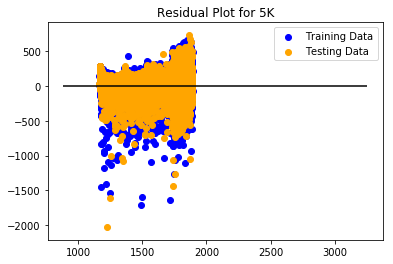

In [522]:
plt.scatter(model_5K.predict(X_train_5K), model_5K.predict(X_train_5K) - y_train_5K, c="blue", label="Training Data")
plt.scatter(model_5K.predict(X_test_5K), model_5K.predict(X_test_5K) - y_test_5K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_5K.min(), xmax=y_test_5K.max())
plt.title("Residual Plot for 5K")
plt.show()

### Calculate MSE and $R^2$ for the model

In [523]:
# Used X_test_5K, y_test_5K, and model.predict(X_test_5K) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_5K, predictions_5K)
r2 = model_5K.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")
boston_mse_r2={}


MSE: 14539.96144719538, R2: 0.7380902904952077


In [524]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_5K, 'model_5K.pk1')

['model_5K.pk1']

In [525]:
# # To save the model without the training data, in order to make predictions without re-training the model
# # Source: https://www.geeksforgeeks.org/saving-a-machine-learning-model/

# import pickle
# from sklearn.externals import joblib 
  
# # Save the model as a pickle in a file 
# joblib.dump(model_5K, 'model_5K.pkl') 
  
# # Load the model from the file 
# model_5K_from_joblib = joblib.load('model_5K.pkl')  
  
# # Use the loaded model to make predictions 
# model_5K_from_joblib.predict(X_test_5K) 

### LASSO model

performs feature selection by reducing small coefficient values to absolute zero

In [526]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_5K, y_train_5K)

predictions = lasso.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions_5K)
r2 = lasso.score(X_test_5K, y_test_5K)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 14539.96144719538, R2: 0.7380894023460121


### Ridge model

reduces multicollinearity
create plot to show differences in coefficient values
use code from here: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [527]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge_5K = Ridge(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = ridge_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = ridge_5K.score(X_test_5K, y_test_5K)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 14540.010752946926, R2: 0.738090290476122


### ElasticNet model

In [528]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet_5K = ElasticNet(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = elasticnet_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = elasticnet_5K.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 14540.010752946926, R2: 0.738089288083077


(79038, 5) (79038, 1)


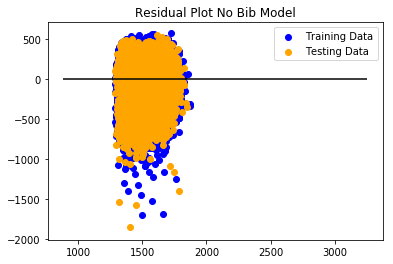

In [529]:
# Re-run the model without the Bib numbers as a feature to test if Bib numbers are helpful

### set up data for modeling
X_nobib = boston_clean[['Age','Official Time Duration', 'F', 'M', 'Temp (F)']]
y_nobib = boston_clean['5K Duration'].values.reshape(-1, 1)
print(X_nobib.shape, y_nobib.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_nobib, X_test_nobib, y_train_nobib, y_test_nobib = train_test_split(X_nobib, y_nobib, random_state=29)
# X_train_nobib.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_nobib = LinearRegression()
model_nobib.fit(X_train_nobib, y_train_nobib)

# Make predictions

predictions_nobib = model_nobib.predict(X_test_nobib)

# Plot the residuals

plt.scatter(model_nobib.predict(X_train_nobib), model_nobib.predict(X_train_nobib) - y_train_nobib, c="blue", label="Training Data")
plt.scatter(model_nobib.predict(X_test_nobib), model_nobib.predict(X_test_nobib) - y_test_nobib, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_nobib.min(), xmax=y_test_nobib.max())
plt.title("Residual Plot No Bib Model")
plt.show()


In [530]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_nobib, predictions)
r2 = model_nobib.score(X_test_nobib, y_test_nobib)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value, so Bib numbers was helping model predictions

MSE: 14540.010752946926, R2: 0.17247699222228907


(79038, 7) (79038, 1)


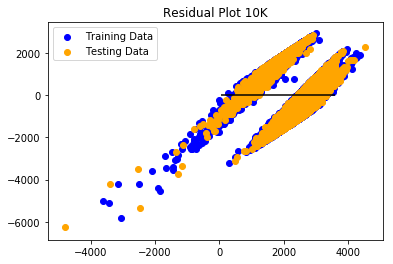

In [531]:
# Re-run the model with the Bib numbers as a feature and for the 5K split times to predict 10K time

### set up data for modeling
X_10K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration']]
y_10K = boston_clean['10K Duration'].values.reshape(-1, 1)
print(X_10K.shape, y_10K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_10K, X_test_10K, y_train_10K, y_test_10K = train_test_split(X_10K, y_10K, random_state=29)
# X_train_5K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_10K = LinearRegression()
model_10K.fit(X_train_10K, y_train_10K)

# Make predictions

predictions_10K = model_10K.predict(X_test_10K)

# Plot the residuals

plt.scatter(model_10K.predict(X_train_10K), model_10K.predict(X_train_10K) - y_train_10K, c="blue", label="Training Data")
plt.scatter(model_10K.predict(X_test_10K), model_10K.predict(X_test_10K) - y_test_10K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_10K.min(), xmax=y_test_10K.max())
plt.title("Residual Plot 10K")
plt.show()

In [532]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_10K, predictions_10K)
r2 = model_10K.score(X_test_10K, y_test_10K)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value

MSE: 567342.5892212755, R2: 0.3254541931570467


In [533]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_10K, 'model_10K.pk1')

['model_10K.pk1']

(79038, 8) (79038, 1)


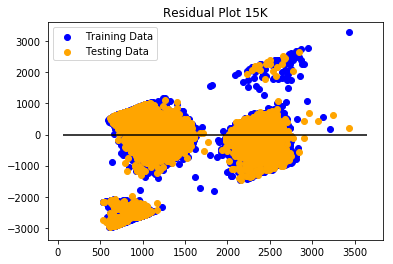

In [534]:
# Re-run the model with the Bib numbers as a feature and for the 5K and 10K split times to predict 15K time

### set up data for modeling
X_15K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration']]
y_15K = boston_clean['15K Duration'].values.reshape(-1, 1)
print(X_15K.shape, y_15K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_15K, X_test_15K, y_train_15K, y_test_15K = train_test_split(X_15K, y_15K, random_state=29)
# X_train_15K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_15K = LinearRegression()
model_15K.fit(X_train_15K, y_train_15K)

# Make predictions

predictions_15K = model_15K.predict(X_test_15K)

# Plot the residuals

plt.scatter(model_15K.predict(X_train_15K), model_15K.predict(X_train_15K) - y_train_15K, c="blue", label="Training Data")
plt.scatter(model_15K.predict(X_test_15K), model_15K.predict(X_test_15K) - y_test_15K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_15K.min(), xmax=y_test_15K.max())
plt.title("Residual Plot 15K")
plt.show()

In [535]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_15K, predictions_15K)
r2 = model_15K.score(X_test_15K, y_test_15K)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value

MSE: 452716.098402794, R2: 0.33860724153058086


In [536]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_15K, 'model_15K.pk1')

['model_15K.pk1']

(79038, 9) (79038, 1)


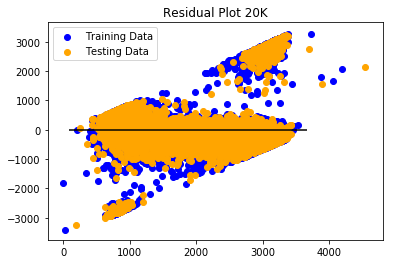

In [537]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K and 15K split times to predict 20K time

### set up data for modeling
X_20K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration']]
y_20K = boston_clean['20K Duration'].values.reshape(-1, 1)
print(X_20K.shape, y_20K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_20K, X_test_20K, y_train_20K, y_test_20K = train_test_split(X_20K, y_20K, random_state=29)
# X_train_20K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_20K = LinearRegression()
model_20K.fit(X_train_20K, y_train_20K)

# Make predictions

predictions_20K = model_20K.predict(X_test_20K)

# Plot the residuals

plt.scatter(model_20K.predict(X_train_20K), model_20K.predict(X_train_20K) - y_train_20K, c="blue", label="Training Data")
plt.scatter(model_20K.predict(X_test_20K), model_20K.predict(X_test_20K) - y_test_20K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_20K.min(), xmax=y_test_20K.max())
plt.title("Residual Plot 20K")
plt.show()

In [538]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_20K, predictions_20K)
r2 = model_20K.score(X_test_20K, y_test_20K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 279226.0314521528, R2: 0.602072657798294


In [539]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_20K, 'model_20K.pk1')

['model_20K.pk1']

(79038, 10) (79038, 1)


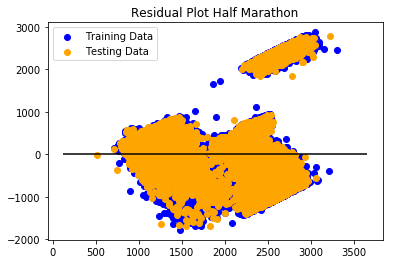

In [540]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K and 20K split times to predict Half marathon time

### set up data for modeling
X_Half = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration']]
y_Half = boston_clean['Half Duration'].values.reshape(-1, 1)
print(X_Half.shape, y_Half.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_Half, X_test_Half, y_train_Half, y_test_Half = train_test_split(X_Half, y_Half, random_state=29)
# X_train_Half.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_Half = LinearRegression()
model_Half.fit(X_train_Half, y_train_Half)

# Make predictions

predictions_Half = model_Half.predict(X_test_Half)

# Plot the residuals

plt.scatter(model_Half.predict(X_train_Half), model_Half.predict(X_train_Half) - y_train_Half, c="blue", label="Training Data")
plt.scatter(model_Half.predict(X_test_Half), model_Half.predict(X_test_Half) - y_test_Half, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_Half.min(), xmax=y_test_Half.max())
plt.title("Residual Plot Half Marathon")
plt.show()

In [541]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_Half, predictions_Half)
r2 = model_Half.score(X_test_Half, y_test_Half)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 601035.8196106626, R2: 0.29046725191726674


In [542]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_Half, 'model_Half.pk1')

['model_Half.pk1']

(79038, 11) (79038, 1)


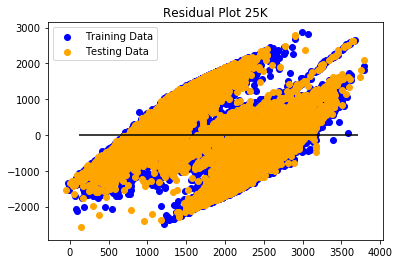

In [543]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K and Half split times to predict 25K time

### set up data for modeling
X_25K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', 'Half Duration']]
y_25K = boston_clean['25K Duration'].values.reshape(-1, 1)
print(X_25K.shape, y_25K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_25K, X_test_25K, y_train_25K, y_test_25K = train_test_split(X_25K, y_25K, random_state=29)
# X_train_25K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_25K = LinearRegression()
model_25K.fit(X_train_25K, y_train_25K)

# Make predictions

predictions_25K = model_25K.predict(X_test_25K)

# Plot the residuals

plt.scatter(model_25K.predict(X_train_25K), model_25K.predict(X_train_25K) - y_train_25K, c="blue", label="Training Data")
plt.scatter(model_25K.predict(X_test_25K), model_25K.predict(X_test_25K) - y_test_25K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_25K.min(), xmax=y_test_25K.max())
plt.title("Residual Plot 25K")
plt.show()

In [544]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_25K, predictions_25K)
r2 = model_25K.score(X_test_25K, y_test_25K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 749037.421155253, R2: 0.4160540825516007


In [545]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_25K, 'model_25K.pk1')

['model_25K.pk1']

(79038, 12) (79038, 1)


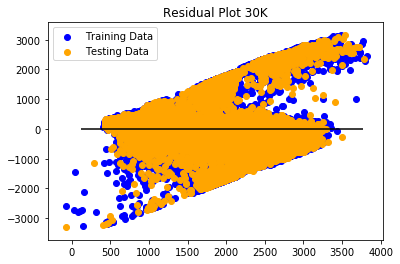

In [546]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K and half split times to predict 30K time

### set up data for modeling
X_30K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration']]
y_30K = boston_clean['30K Duration'].values.reshape(-1, 1)
print(X_30K.shape, y_30K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_30K, X_test_30K, y_train_30K, y_test_30K = train_test_split(X_30K, y_30K, random_state=29)
# X_train_30K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_30K = LinearRegression()
model_30K.fit(X_train_30K, y_train_30K)

# Make predictions

predictions_30K = model_30K.predict(X_test_30K)

# Plot the residuals

plt.scatter(model_30K.predict(X_train_30K), model_30K.predict(X_train_30K) - y_train_30K, c="blue", label="Training Data")
plt.scatter(model_30K.predict(X_test_30K), model_30K.predict(X_test_30K) - y_test_30K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_30K.min(), xmax=y_test_30K.max())
plt.title("Residual Plot 30K")
plt.show()

In [547]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_30K, predictions_30K)
r2 = model_30K.score(X_test_30K, y_test_30K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 470996.0174257314, R2: 0.49689303283195496


In [548]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_30K, 'model_30K.pk1')

['model_30K.pk1']

(79038, 12) (79038, 1)


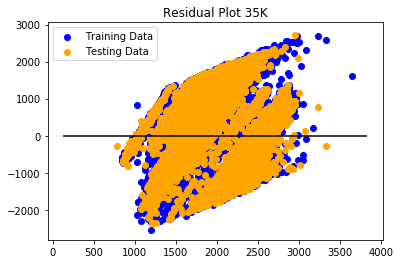

In [549]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K half and 30K split times to predict 35K time

### set up data for modeling
X_35K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration', '30K Duration']]
y_35K = boston_clean['35K Duration'].values.reshape(-1, 1)
print(X_30K.shape, y_30K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_35K, X_test_35K, y_train_35K, y_test_35K = train_test_split(X_35K, y_35K, random_state=29)
# X_train_30K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_35K = LinearRegression()
model_35K.fit(X_train_35K, y_train_35K)

# Make predictions

predictions_35K = model_35K.predict(X_test_35K)

# Plot the residuals

plt.scatter(model_35K.predict(X_train_35K), model_35K.predict(X_train_35K) - y_train_35K, c="blue", label="Training Data")
plt.scatter(model_35K.predict(X_test_35K), model_35K.predict(X_test_35K) - y_test_35K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_35K.min(), xmax=y_test_35K.max())
plt.title("Residual Plot 35K")
plt.show()

In [550]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_35K, predictions_35K)
r2 = model_35K.score(X_test_35K, y_test_35K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 870107.7900968076, R2: 0.19391490931612543


In [551]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_35K, 'model_35K.pk1')

['model_35K.pk1']

(79038, 13) (79038, 1)


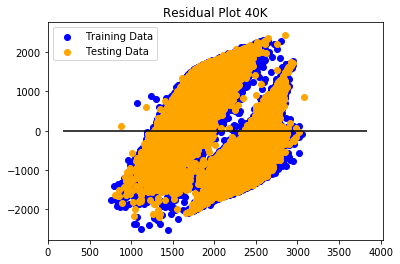

In [552]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K, half and 35K split times to predict 40K time

### set up data for modeling
X_40K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration', '35K Duration']]
y_40K = boston_clean['40K Duration'].values.reshape(-1, 1)
print(X_40K.shape, y_40K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_40K, X_test_40K, y_train_40K, y_test_40K = train_test_split(X_40K, y_40K, random_state=29)
# X_train_40K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_40K = LinearRegression()
model_40K.fit(X_train_40K, y_train_40K)

# Make predictions

predictions_40K = model_40K.predict(X_test_40K)

# Plot the residuals

plt.scatter(model_40K.predict(X_train_40K), model_40K.predict(X_train_40K) - y_train_40K, c="blue", label="Training Data")
plt.scatter(model_40K.predict(X_test_40K), model_40K.predict(X_test_40K) - y_test_40K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_40K.min(), xmax=y_test_40K.max())
plt.title("Residual Plot 40K")
plt.show()

In [553]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_40K, predictions_40K)
r2 = model_40K.score(X_test_40K, y_test_40K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 794349.5216639144, R2: 0.21578837710009224


In [554]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_40K, 'model_40K.pk1')

['model_40K.pk1']

(79038, 13) (79038, 1)


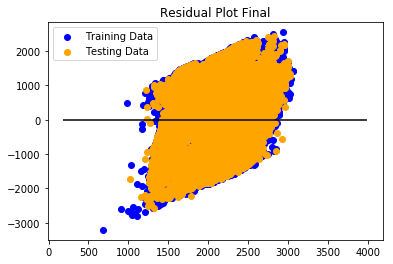

In [555]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K, half, 35K and 40K split times to predict Final time

### set up data for modeling
X_Final = boston_clean[['Bib', 'Age', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration', '35K Duration', '40K Duration']]
y_Final = boston_clean['Official Time Duration'].values.reshape(-1, 1)
print(X_Final.shape, y_Final.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_Final, X_test_Final, y_train_Final, y_test_Final = train_test_split(X_Final, y_Final, random_state=29)
# X_train_Final.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_Final = LinearRegression()
model_Final.fit(X_train_Final, y_train_Final)

# Make predictions

predictions_Final = model_Final.predict(X_test_Final)

# Plot the residuals

plt.scatter(model_Final.predict(X_train_Final), model_Final.predict(X_train_Final) - y_train_Final, c="blue", label="Training Data")
plt.scatter(model_Final.predict(X_test_Final), model_Final.predict(X_test_Final) - y_test_Final, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_Final.min(), xmax=y_test_Final.max())
plt.title("Residual Plot Final")
plt.show()

In [556]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_Final, predictions_Final)
r2 = model_Final.score(X_test_Final, y_test_Final)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 905387.2842309258, R2: 0.13601127590746798


In [557]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_Final, 'model_Final.pk1')

['model_Final.pk1']

In [558]:
boston_clean.columns

Index(['Bib', 'Age', '5K Duration', '10K Duration', '15K Duration',
       '20K Duration', 'Half Duration', '25K Duration', '30K Duration',
       '35K Duration', '40K Duration', 'Official Time Duration', 'Temp (F)',
       'F', 'M'],
      dtype='object')